In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
cd /content/gdrive/My Drive/Spring2020/CV/projectFinal/VGG16-In-Keras

/content/gdrive/My Drive/Spring2020/CV/projectFinal/VGG16-In-Keras


In [0]:
#!pip install -r requirements.txt

In [0]:
import emoji
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
from keras.preprocessing import image

Using TensorFlow backend.


In [0]:
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory="data/train",target_size=(244,244))
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory="data/validation", target_size=(244,244))

Found 3000 images belonging to 5 classes.
Found 1000 images belonging to 5 classes.


In [0]:
model = Sequential()

In [0]:
model.add(Conv2D(input_shape=(244,244,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))

In [0]:
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))

In [0]:
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [0]:
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))

In [0]:
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))

In [0]:
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [0]:
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))

In [0]:
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))

In [0]:
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))

In [0]:
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [0]:
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

In [0]:
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

In [0]:
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

In [0]:
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [0]:
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

In [0]:
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

In [0]:
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

In [0]:
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [0]:
model.add(Flatten())

In [0]:
model.add(Dense(units=4096,activation="relu"))

In [0]:
model.add(Dense(units=4096,activation="relu"))

In [0]:
model.add(Dense(units=5, activation="softmax"))

In [0]:
opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 244, 244, 64)      1792      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 244, 244, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 122, 122, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 122, 122, 128)     73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 122, 122, 128)     147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 61, 61, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 61, 61, 256)      

In [0]:
checkpoint = ModelCheckpoint("vgg16_hand_3.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=10, verbose=1, mode='auto')

In [0]:
hist = model.fit_generator(steps_per_epoch=10,generator=traindata, validation_data= testdata, validation_steps=10,epochs=50,callbacks=[checkpoint,early])

Epoch 1/50
10/10 [==============================] - 72s 7s/step - loss: 897.8797 - accuracy: 0.2156 - val_loss: 1.6144 - val_accuracy: 0.2188

Epoch 00001: val_accuracy improved from -inf to 0.21875, saving model to vgg16_hand_3.h5
Epoch 2/50
10/10 [==============================] - 72s 7s/step - loss: 1.7029 - accuracy: 0.2344 - val_loss: 1.6133 - val_accuracy: 0.2094

Epoch 00002: val_accuracy did not improve from 0.21875
Epoch 3/50
10/10 [==============================] - 71s 7s/step - loss: 1.6032 - accuracy: 0.2000 - val_loss: 1.5959 - val_accuracy: 0.2156

Epoch 00003: val_accuracy did not improve from 0.21875
Epoch 4/50
10/10 [==============================] - 70s 7s/step - loss: 1.6074 - accuracy: 0.2688 - val_loss: 1.5952 - val_accuracy: 0.2196

Epoch 00004: val_accuracy improved from 0.21875 to 0.21959, saving model to vgg16_hand_3.h5
Epoch 5/50
10/10 [==============================] - 70s 7s/step - loss: 1.6102 - accuracy: 0.1955 - val_loss: 1.5182 - val_accuracy: 0.2719

Ep

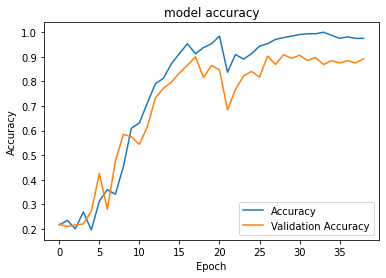

In [0]:
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
#plt.plot(hist.history['loss'])
#plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
#plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.legend(["Accuracy","Validation Accuracy"])
plt.show()

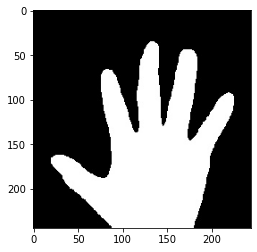

In [0]:
img = image.load_img("test4.jpg",target_size=(244,244))
#print(img)
img = np.asarray(img)
#print(img.shape)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
#print(img.shape)
from keras.models import load_model
saved_model = load_model("vgg16_hand_3.h5")
output = saved_model.predict(img)

In [0]:
pred = np.argmax(output[0])
gestures = [':raised_fist:',':love-you_gesture:',':OK_hand:',':raised_back_of_hand:',':victory_hand:']
print(emoji.emojize(gestures[pred]))

🤚


In [0]:
print(hist.history['loss'])

[897.8796525597572, 1.7029281735420227, 1.6031753778457642, 1.6073925375938416, 1.6097427912247486, 1.4423487901687622, 1.436565089225769, 1.519780170917511, 1.3092177867889405, 1.0263171255588532, 0.9360634922981262, 0.7677482962608337, 0.6684073060750961, 0.48062616437673567, 0.33471818417310717, 0.33372161919489884, 0.24727045204490422, 0.27151610404253007, 0.19811190590262412, 0.11878869645297527, 0.04712846462425659, 0.6601520841941237, 0.3031464906409383, 0.5256364226341248, 0.24709664285182953, 0.16555840242654085, 0.11445296932943165, 0.09382017434407504, 0.06363183171488344, 0.06343814486108386, 0.055973751982674, 0.02724215933121741, 0.029873331967974082, 0.006036893437759807, 0.018055772825027815, 0.08485758066628932, 0.062437991285696624, 0.07903356517199427, 0.07530039120465518]


In [0]:
print(hist.history['val_accuracy'])

[0.21875, 0.20937499403953552, 0.21562500298023224, 0.21959459781646729, 0.2718749940395355, 0.42500001192092896, 0.2804054021835327, 0.4749999940395355, 0.5843750238418579, 0.5743243098258972, 0.543749988079071, 0.6156250238418579, 0.7331081032752991, 0.7718750238418579, 0.796875, 0.8344594836235046, 0.8656250238418579, 0.8999999761581421, 0.815625011920929, 0.8648648858070374, 0.846875011920929, 0.684374988079071, 0.7668918967247009, 0.8218749761581421, 0.840624988079071, 0.8175675868988037, 0.903124988079071, 0.8687499761581421, 0.9087837934494019, 0.893750011920929, 0.90625, 0.8851351141929626, 0.8968750238418579, 0.8687499761581421, 0.8843749761581421, 0.875, 0.8843749761581421, 0.875, 0.8918918967247009]


In [0]:
print(hist.history['accuracy'])

[0.215625, 0.234375, 0.2, 0.26875, 0.19551282, 0.3125, 0.359375, 0.340625, 0.453125, 0.609375, 0.63125, 0.7125, 0.790625, 0.8125, 0.871875, 0.91346157, 0.953125, 0.9125, 0.9375, 0.953125, 0.984375, 0.8375, 0.909375, 0.890625, 0.9125, 0.94375, 0.953125, 0.97115386, 0.978125, 0.984375, 0.990625, 0.99375, 0.99375, 1.0, 0.9875, 0.975, 0.98125, 0.975, 0.975]
